In [28]:
import pandas as pd
df=pd.read_csv('data.csv')
df.describe() #Basic statistical description of the data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [29]:
df.isnull().sum() #checking if there are any null values

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [30]:
df['Calories'].fillna(df['Calories'].mean(),inplace=True)# replacing the null values with mean
df['Calories'].isnull().sum() #checking if null still exists

0

In [103]:
df.groupby(['Duration','Pulse']).agg({'Calories':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})#aggregation of duration,pulse using calories and Maxpulse

Calories                     Maxpulse                  
                    min   max count    mean      min  max count   mean
Duration Pulse                                                        
15       80          50    50     1    50.0      100  100     1  100.0
         124        124   124     1   124.0      139  139     1  139.0
20       83          50    50     1    50.0      107  107     1  107.0
         95          77    77     1    77.0      112  112     1  112.0
         106        110   110     1   110.0      136  136     1  136.0
...                 ...   ...   ...     ...      ...  ...   ...    ...
180      101        600   600     1   600.0      127  127     1  127.0
210      108       1376  1376     1  1376.0      160  160     1  160.0
         137       1860  1860     1  1860.0      184  184     1  184.0
270      100       1729  1729     1  1729.0      131  131     1  131.0
300      108       1500  1500     1  1500.0      143  143     1  143.0

[94 rows x 8 columns]

In [56]:
df[(df['Calories'].between(500,1000))]#calories between 500 and 1000 data

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [52]:
df[(df['Calories'] > 500) & (df['Pulse'] <= 100)]#calories >500 and pulse<100 data

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
79,270,100,131,1729.0
87,120,100,157,1000.1
99,90,93,124,604.1
103,90,90,100,500.4


In [60]:
df_modified=df.loc[:,df.columns!='Maxpulse']
df_modified#df without maxpulse

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [64]:
df.drop('Maxpulse',axis=1) #detlting Maxpulse in the main df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [74]:
df['Calories']=df['Calories'].astype(int)#converting the data type to int
type(df['Calories'][0])

numpy.int32

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

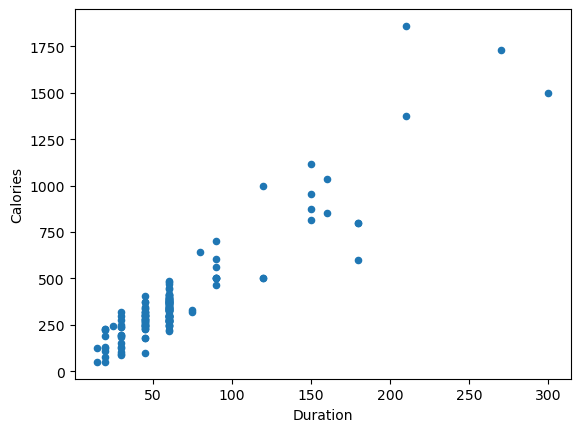

In [80]:
df.plot.scatter(x='Duration',y='Calories') #scatter plot


In [82]:
sdf=pd.read_csv('Salary_Data.csv')
sdf.describe()#salary data description

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(sdf.iloc[:, :-1].values,sdf.iloc[:,1].values,test_size =0.2)
x_train#checking train data

array([[ 8.7],
       [ 1.1],
       [ 3. ],
       [ 1.3],
       [ 4.9],
       [ 2.9],
       [10.3],
       [ 3.2],
       [ 4.1],
       [ 8.2],
       [ 3.9],
       [10.5],
       [ 4. ],
       [ 2. ],
       [ 3.7],
       [ 6.8],
       [ 2.2],
       [ 5.3],
       [ 9. ],
       [ 6. ],
       [ 1.5],
       [ 7.9],
       [ 5.9],
       [ 5.1]])

In [182]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()#linearregression
m.fit(x_train, y_train)#fitting the data for the linear regression

LinearRegression()

In [183]:
y_pred=m.predict(x_test)#predicting the data for testing using the uilt model
#y_pred*z+min(sdf['Salary'])

In [184]:
import math
from sklearn.metrics import mean_squared_error as ms
ms(y_pred,y_test)#mean square error

35611515.02367899

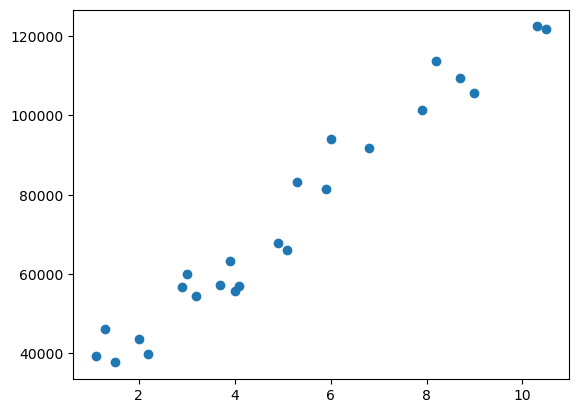

In [185]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)

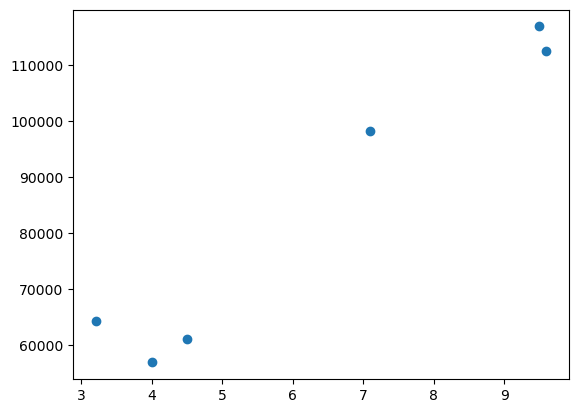

In [186]:
plt.scatter(x_test,y_test)